In [1]:
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Importamos dataset del vino
vinitos = pd.read_csv('/content/drive/MyDrive/Ironhack/database_liquors.csv')

In [4]:
vinitos.head(1)

,invoice_id,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_usd,volume_sold_lt,volume_sold_gallons,date_mes,date_mes_truncate
0,INV-22970800091,2019-11-01,2569,Hy-Vee Food Store #2 / Cedar Rapids,279 Collins Road NE,Cedar Rapids,52402,POINT (-91.630677 42.027805),57,LINN,1062500,Flavored Rum,370,PERNOD RICARD USA,42718,Malibu Coconut Rum,6,1.75,16.99,25.49,1.0,25.49,1.75,0.46,11,2019-11-01


In [ ]:
#Eliminamos columna que no nos sirve
#Axis=1 columnas, inplane=hace en un mismo paso todo
vinitos.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#Revisamos que quitamos anteriormente
vinitos.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


### Prueba Z

Es la manera estadística de probar nuestra hipótesis si:
* Conocemos la varianza de la población o
* No conocemos la varianza, pero nuestra muestra es $n>=30$ \\

Tenemos que \\

$Z =\frac{\bar x - \mu}{\frac {\sigma}{\sqrt n}}$ \\
donde \\
$
\bar x $ = Media de la muestra \\
$\mu $= media de la población \\
$\sigma $ = Desviación estándar de la población \\
$n $= Tamaño de la muestra

Ejemplo:

En este dataset de reviews de vinos, vamos a asumir que los datos  de puntaje de los vinos están distribuidos de forma
normal.
--->Points: The number of points WineEnthusiast rated the wine on a scale of 1-100<---

Entonces definimos nuestra media poblacional ($\mu$) y desviación estándar ($\sigma$). Estos serán nuestros
parámetros. Estamos asumiendo aquí que los datos que tenemos son los datos de la población, sin muestreo.

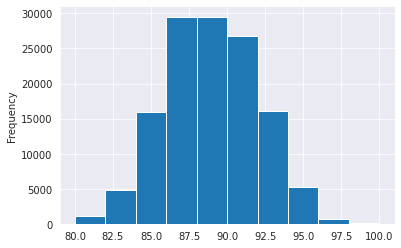

In [ ]:
vinitos.points.plot.hist()

In [ ]:
sns.set_style('darkgrid')

In [ ]:
#definimos 
points = vinitos.points
mu = points.mean()
sigma = points.std()
# f permite usar expresieones dentro del código
print(f'mu: {mu}; sigma: {sigma}')

mu: 88.44713820775404; sigma: 3.0397302029162336


#Ejemplo
Suponiendo que tengo una muestra de n=10 puntajes de vinos con una media muestral de $\bar{x}$ = 90.2.
Esta muestra viene de la misma población que las evaluaciones que tengo aquí?

Para probar, vamos a utilizar una prueba z de 1 muestra. Primero, declaramos hipótesis nula e hipótesis alternativa:

$H_0$: La muestra es de la misma población de enólogos -> $\bar{x} = \mu$

$H_A$: La muestra no viene de la misma población de enólogos -> $\bar{x} \neq \mu$

Enseguida, específicamos qué nivel de significancia vamos a utilizar. En estadística, un nivel de signficancia común
es el de $\alpha \leq 0.05$. Vamos a comprobar utilizando un $\alpha = 0.05$

Luego, vamos a nuestra [tabla z] para buscar el valor crítico de z que corresponde con este nivel de significancia.
Nuestra prueba tendrá 2 colas porque no nos importa si la media muestral es mayor o menor que la media poblacional.
Solamente estamos probando si son iguales o diferentes.

[tabla z]: https://www.sjsu.edu/faculty/gerstman/StatPrimer/z-two-tails.pdf



In [ ]:
#nivel alfa de .05 (p-value)
#Buscar en la tabla donde el valor sea .05 y ese es neustro valor de Z
z_test = 1.96 
x_bar = 90.2
n = 10

Calculamos el valor de z para nuestra media muestral comparada con la media poblacional dividiendo la diferencia
entre las dos medias entre la desviación estándar de la muestra, que es el error estándar: $\frac{\sigma}{\sqrt{n}}$.

Si este estadístico es menor que nuestro valor crítico de z, entonces no rechazamos la hipótesis nula; de
lo contrario, rechazamos la hipótesis nula en favor de la alternativa.

In [ ]:
standard_error = sigma/np.sqrt(n)
#aplicando formula de Z
z_stat = (x_bar - mu)/standard_error


if z_stat < z_test:
    print(f'El valor de z es {z_stat}, menor que {z_test}. \nNo rechazamos la hipótesis nula: la media muestral '
          f'no es significativamente distinta de la media poblacional.')
else:
    print(f'El valor de z es {z_stat}, mayor que {z_test}. \nRechazamos la hipótesis nula: la media muestral es '
          f'significativamente distinta de la media poblacional.')

El valor de z es 1.823528838731901, menor que 1.96. 
No rechazamos la hipótesis nula: la media muestral no es significativamente distinta de la media poblacional.


In [ ]:
# Qué pasaría si la muestra fuera más grande, aun con la misma media?
n = 30
standard_error = sigma/np.sqrt(n)
z_stat = (x_bar - mu)/standard_error

if z_stat < z_test:
    print(f'El valor de z es {z_stat}, menor que {z_test}. \nNo rechazamos la hipótesis nula: la media muestral '
          f'no es significativamente distinta de la media poblacional.')
else:
    print(f'El valor de z es {z_stat}, mayor que {z_test}. \nRechazamos la hipótesis nula: la media muestral es '
          f'significativamente distinta de la media poblacional.')

El valor de z es 3.1584445977507256, mayor que 1.96. 
Rechazamos la hipótesis nula: la media muestral es significativamente distinta de la media poblacional.


In [ ]:
# Ahora tenemos que sí hay una diferencia significativa entre las dos medias. Esto sucede porque, a mayor muestra,
# menor el error estándar. Esto significa que la distribución de las medias 
muestrales se hace más angosta si n crece
# y, por lo tanto, es menos probable que haya intersección con la media poblacional si todo lo demás se mantiene igual.

### Prueba T

En el ejercicio anterior, asumimos que conocemos la media y desviación estándar poblacional, entonces estamos
comparando nuestra muestra con esta población. Sin embargo, durante la mayoría de las veces no vamos a conocer estos
datos.

Nos permite medir nuestra hipótesis cuando:
* No conocemos la varianza de la población
* Nuestra muestra es pequeña, n < 30 

$t$ = $
\frac {\bar x - \mu}{\frac {s}{\sqrt n}}
$ \\
donde \\
$
\bar x $ = Media de la muestra \\
$\mu $= media de la población \\
$s $ = Desviación estándar de la muestra \\
$n $= Tamaño de la muestra



![alt text](https://andyjconnelly.files.wordpress.com/2017/05/distributions1.png 'Ejemplo Normal vs T-Student')

Entonces, si no conocemos los parámetros de nuestra población, pero sabemos que la distribución de nuestra muestra se
 asemeja a la normal (simétrica con tendencia a la media), lo más probable es que tengamos una distribución T de
 Student. En esta distribución, cuanto mayor la muestra, más similar a la normal será.

 La prueba T es calculada de forma semejante a la prueba z, pero está basada en esta distribución y por lo tanto
 tiene valores de referencia distintos.

### Prueba T de 1 Muestra

Supongamos que tengo una muestra y quiero comparar con un valor específico. En nuestro ejemplo, vamos a suponer que
yo sé que la evaluación promedio de los vinos en Francia es de 88, y quiero saber si los vinos nuevos ("Nouveau") tiene
una media de evaluación semejante a la población general. Voy a probar lo mismo con los vinos que están designados
como "Prestige"

En este caso, usamos una Prueba T de 1 sola muestra, ya que estamos comparando el valor de esta media con un valor de
 referencia (benchmark).

Nuestras hipótesis:

$H_0$: $\bar{x} - \mu = 0$ - es decir, no hay diferencia entre la media muestral y $\mu$.

$H_A$: $\bar{x} - \mu \neq 0$ - prueba de dos colas

$\alpha = 0.05$

Aquí veo en mi [tabla T]

[tabla T]: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf


In [ ]:
#nuestra media de referencia,
vinos_franceses = vinitos['points'][vinitos.country == 'France']
mu = vinos_franceses.mean()

mu

88.84510931064138

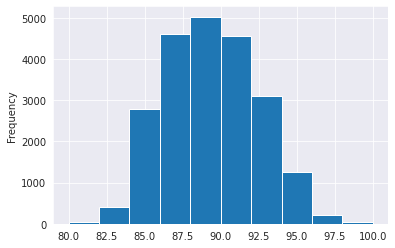

In [ ]:
#vemos que se comporta como una normal
vinos_franceses.plot.hist()

In [ ]:
#Si queremos observar como se comportan nuestros diferentes tipos de vinos, 
#definimos una función que nos tome 100 muestras aleatorias de nuestro dataset
def generate_means(data):
    bs_means = []
    for i in range(1000):
        samples = np.random.choice(data, 100, replace=True)
        bs_means.append(samples.mean())
    return bs_means

medias_francia = generate_means(vinos_franceses)



In [ ]:
mean(medias_francia)

88.83992

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


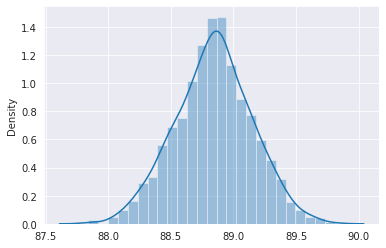

In [ ]:
#visualizamos como se vería. En este caso Density recordemos que es nuesto KDE
#(Kernel Density Function). 
#No es una probabilidad, es la probabilidad de la densidad, es decir, la probabilidad 
#por unidad el eje x. Aquí, si sacamos el área bajo la curva nos deberá dar 1
#y la razon por la cual nos dan probabilidades de densidad mayor a 1 es porqué
# gran parte de la probabilidades son mucho menores a 1 entonecs es necesario que se de así
# para que el área bajo la curva sea 1 

#eje x nuestra media
# https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok
sns.distplot(medias_francia, hist=True, kde=True)
plt.show()

In [ ]:
#los datos que queremos probar contra la media de referencia
nouveau = vinitos['points'][(vinitos.country == 'France')
&(vinitos.designation == 'Nouveau')]

In [ ]:
# Solo para probar, vamos a checar antes la media muestral, creen que la diferencia será significativa?

nouveau.mean()

85.32432432432432

In [ ]:
# Vamos a hacer la prueba con scipy, cómo interpretamos el resultado?

t, p = stats.ttest_1samp(nouveau, mu)
#nos regresas el valor de t
# Un valor de t pequeño nos dice que nuestros grupos son similares
# Un valor de t muy alto nos dice que nuestros grupos son diferentes
##Un valor t negativo indica una inversión en la direccionalidad del efecto,
#lo que no influye en la importancia de la diferencia entre grupos.


#Recordemos que los p-values bajos son los que nos interesan.
#nos dicen que nuestros datos no ocurrieron por suerte.

#Un valor de p menor que 0.05 (típicamente ≤ 0.05) es estadísticamente 
#significativo. Indica una fuerte evidencia en contra de la hipótesis nula, 
#ya que hay menos del 5% de probabilidad de que la nula sea correcta.
print(t, p)

-19.801986102576723 6.082659615924452e-21


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


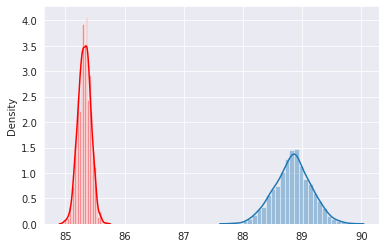

In [ ]:
#Visualizamos solo para ver como la media de este grupo se distribuye 
#de forma muy diferente de nuestro referente

medias_nouveau = generate_means(nouveau)

#Eje X es nuestra media.
sns.distplot(medias_francia, hist=True, kde=True)
sns.distplot(medias_nouveau, hist=True, kde=True, color='red')
plt.show()

In [ ]:
# Ahora vamos a probar con los vinos Prestige, 
#serán similares a la media?

prestige = vinitos['points'][(vinitos.country == 'France')&(vinitos.designation == 'Prestige')]

In [ ]:
#Si son similares a la media de nuestro vinos Franceses

prestige.mean()

88.0

In [ ]:
#De este resultado, podemos ver que
#nuestros valores son muy similares a la media
t, p = stats.ttest_1samp(prestige, mu)

print(t, p)

-2.6044888135679285 0.011427039851169333


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


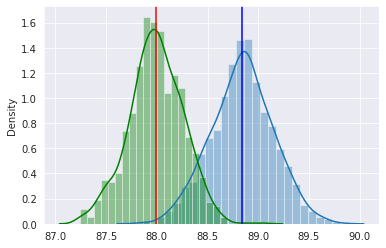

In [ ]:
#Aquí vemos un poco más claro... las distribuciones tienen un overlap,
# SI tienen overlap, se concluye que la diferencia entre ambos grupos
#estadisticamente no es significativa.
#Si no hay overlap, si hay diferencia significativa
#pero vemos como son diferentes y la media de
# los vinos Prestige está muy en la punta de la distribución de referencia.

medias_prestige = generate_means(prestige)

sns.distplot(medias_francia, hist=True, kde=True)
sns.distplot(medias_prestige, hist=True, kde=True, color='green')
plt.axvline(mean(medias_prestige), color='r')
plt.axvline(mean(medias_francia), color='b')
plt.show()

---

# Two Sample Hypothesis Tests with Scipy

# Matched Pairs

Significa que los datos en las dos muestras son dependientes. (las dos muestras son dependientes, contienen al mismo grupo de personas)

Por ejemplo: \\
Se ha conducido un estudio para investigar la efectividad del hipnotismo en la reducción del dolor. Los resultados para sujetos aleatorios seleccionados estan mostrados a continuación.

Antes | Después | Diferencia
---: | ---: | ---:
6.8 | 6.6 | 0.2
2.4 | 6.5 | -4.1
7.4 | 9 | -1.6
8.5 | 10.3 | -1.8
8.1 | 11.3 | -3.2
6.1 | 8.1 | -2
3.4 | 6.3 | -2.9
2 | 11.6 | -9.6

En promedio, las mediciones sensoriales son mas bajas después del hipnotismo? Con el 95%

$H_0$: No hay una mejora en la percepcion del dolor despues de la hipnosis \\
$H_a$: Si hay una mejora en la percepcion del dolor despues de la hipnosis



In [ ]:
from scipy.stats import ttest_rel, ttest_1samp
import pandas as pd

In [ ]:
mediciones_dict = {'antes':[6.8, 2.4, 7.4, 8.5, 8.1, 6.1, 3.4, 2], 'despues':[6.6, 6.5, 9, 10.3, 11, 8.1, 6.3, 11.6]}
medicionesDF = pd.DataFrame(mediciones_dict)

In [ ]:
#Calculate the t-test on TWO RELATED samples of scores, a and b.
t, p = ttest_rel(medicionesDF.antes, medicionesDF.despues)
# Un valor de t pequeño nos dice que nuestros grupos son similares
# Un valor de t muy alto nos dice que nuestros grupos son diferentes
#Recordemos que los p-values bajos son los que nos interesan.
#nos dicen que nuestros datos no ocurrieron por suerte.
print(t, p)

-2.9986241010889545 0.019980979447274314


In [ ]:
medicionesDiferencia = medicionesDF.antes - medicionesDF.despues

In [ ]:
medicionesDiferencia

NameError: ignored

In [ ]:
t, p = ttest_1samp(medicionesDiferencia, 0)
print(t, p)

-2.9986241010889545 0.019980979447274314


---
# Independent Samples

---



**Independent Samples**

Consideramos aquellos casos  en los que tenemos dos o más ejemplos que no hacen match entre ellos. Por ejemplo A/B test en páginas web dado que un usuario ve una interfaz diferente a los otros. 

Se deben cumplir ciertos estatutos:


1.   Independencia de los datos: Que un dato no afecte al otro
2.   Las muestras fueron tomadas aleatoriamente de una población que se distribuye normalmente

Podemos tener dos casos:


1.   Varianzas iguales 
2.   Varianzas diferentes

Nuesta hipótesis aquí son:

$
H_0 = \mu_1 = \mu_2 \\
H_1 = \mu_1 \neq \mu_2
$


Se tiene información de dos pruebas que se hicieron en un sitio de e-commerce:

a | b 
---: | ---: 
.27 | 13.61 
6.08 | 21.53
13.74 | 9.23
9.70 | 5.36
7.0| 12.90

Asumimos que las varianzas son las mismas (dado previo conocimiento de los datos). Ahora, con un 95% de grado de confianza, vamos a validar si hay o no diferencia.

$H_0$: Dado el layout que se le mostro al usuario, no hubo cambio alguno en las variables \\
$H_a$: Dado el layout que se le mostro al usuario, afecto las variables



In [ ]:
ab_test = pd.read_csv('/content/drive/MyDrive/Databases/Week 13/ab_test.csv')
ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [ ]:
#Suponiendo que nuestras varianzas son iguales
from scipy.stats import ttest_ind
#Prueba de T para valores indepentdientes
ttest_ind(ab_test.a, ab_test.b, equal_var=True)


Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

In [ ]:
#Suponiendo que nuestras varianzas no son iguales
ttest_ind(ab_test.a, ab_test.b, equal_var=False)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828825)

Rechazamos $H_0$ dado que el $p - value$  es muy pequeño, lo cual significa que hay diferencia entre las dos medias. Difiere ligeramente entre los de varianza igual y diferente. 